<a href="https://colab.research.google.com/github/SiharaVikashIITD/Data-Analytics/blob/main/online_advertising_performance_data_DsResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Use
histograms and boxplots for the distribution of single variables,

Scatter plots and heatmaps for relationships between variables

Bar plots, and line plots for comparisons over categories or time.

Pie charts and count plots are ideal for categorical data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('online_advertising_performance_data.csv')

In [ ]:
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

#1.What is the overall trend in user engagement throughout the campaign period?

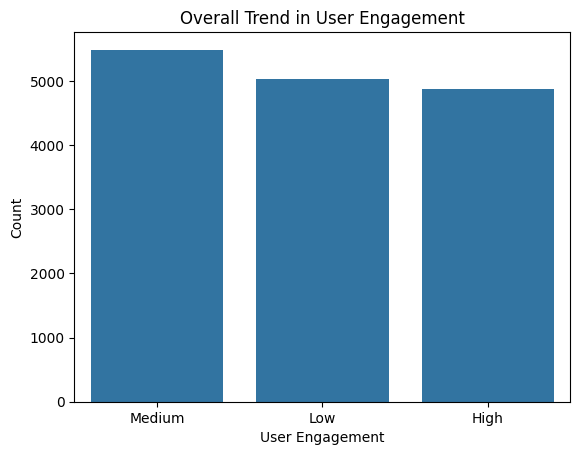

user_engagement
Medium    5489
Low       5035
High      4884
Name: count, dtype: int64


In [ ]:
user_engage =df['user_engagement'].value_counts()
sns.barplot(x=user_engage.index, y=user_engage.values)
plt.xlabel('User Engagement')
plt.ylabel('Count')
plt.title('Overall Trend in User Engagement')
plt.show()
print(user_engage)

#2.	How does the size of the ad (banner) impact the number of clicks generated?

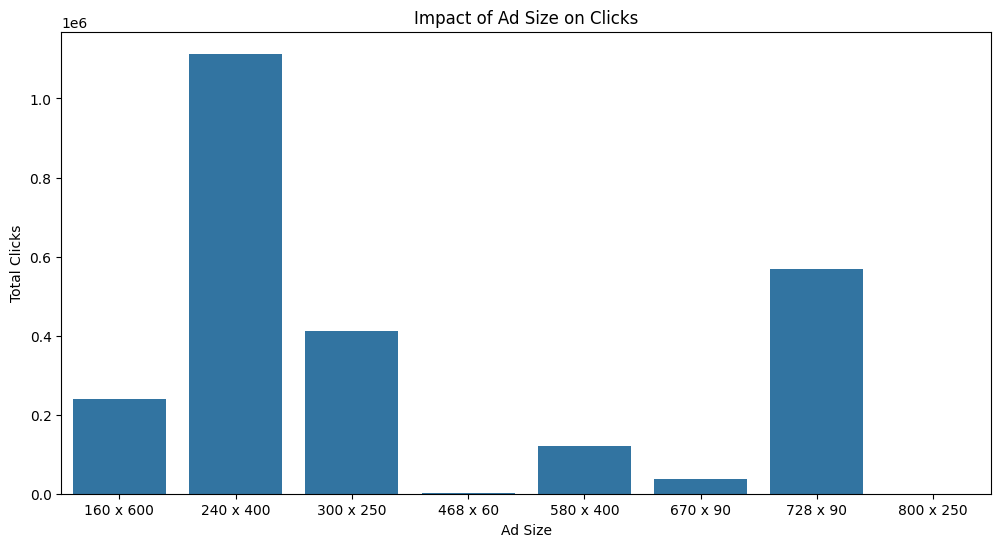

In [ ]:
# Impact of ad size on clicks
ad_size_clicks = df.groupby('banner')['clicks'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='banner', y='clicks', data=ad_size_clicks)
plt.title('Impact of Ad Size on Clicks')
plt.xlabel('Ad Size')
plt.ylabel('Total Clicks')
plt.show()

#3.Which publisher spaces (placements) yielded the highest number of displays and clicks?

placement
mno    4501
def    3538
ghi    3484
jkl    2504
abc     968
Name: count, dtype: int64
publisher spaces (placements) yielded the highest number of displays and clicks :mno


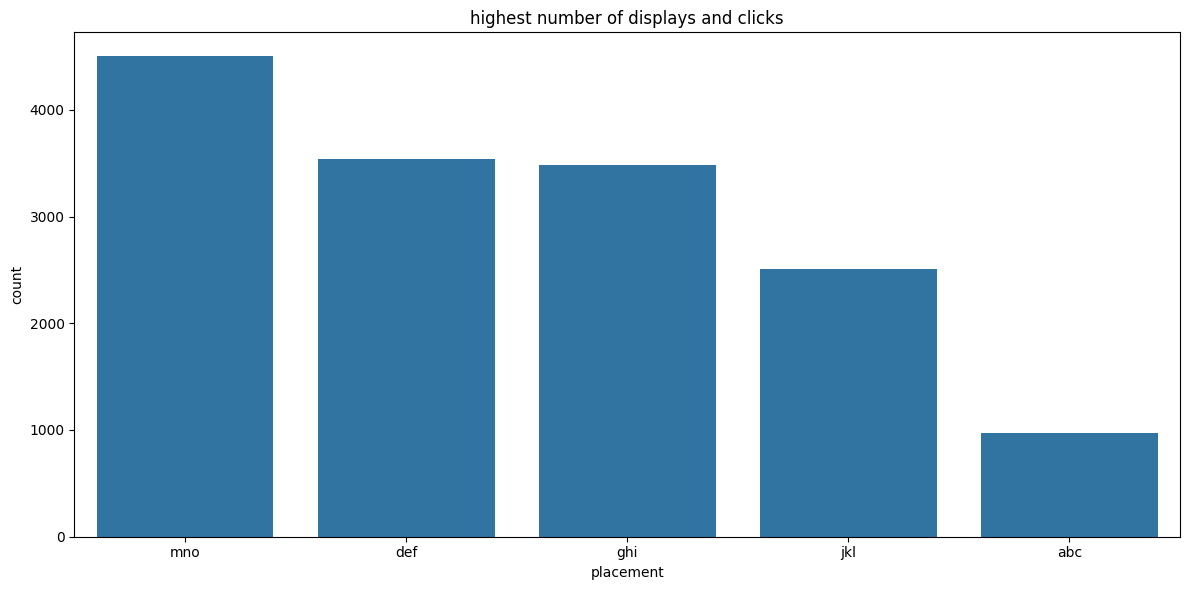

In [ ]:
highest_clicks =df['placement'].value_counts() # Catogorical data
print(highest_clicks)

# Get the index (category) with the maximum value
max_category = highest_clicks.idxmax()
print('publisher spaces (placements) yielded the highest number of displays and clicks :'+ max_category)

plt.figure(figsize=(12,6))
sns.barplot(x=highest_clicks.index,y=highest_clicks.values)
plt.xlabel('placement')
plt.ylabel('count')
plt.title('highest number of displays and clicks')
plt.tight_layout()
plt.show()

#4.Is there a correlation between the cost of serving ads and the revenue generated from clicks?

In [ ]:
cost =df['cost']
revenue=df['revenue']
correlation = cost.corr(revenue)
print(correlation)


0.7605199343382271


#Note :
 A scatter plot is a good way to visualize the relationship between two variables. If they are positively correlated, the points will trend upwards; if negatively correlated, they will trend downwards.

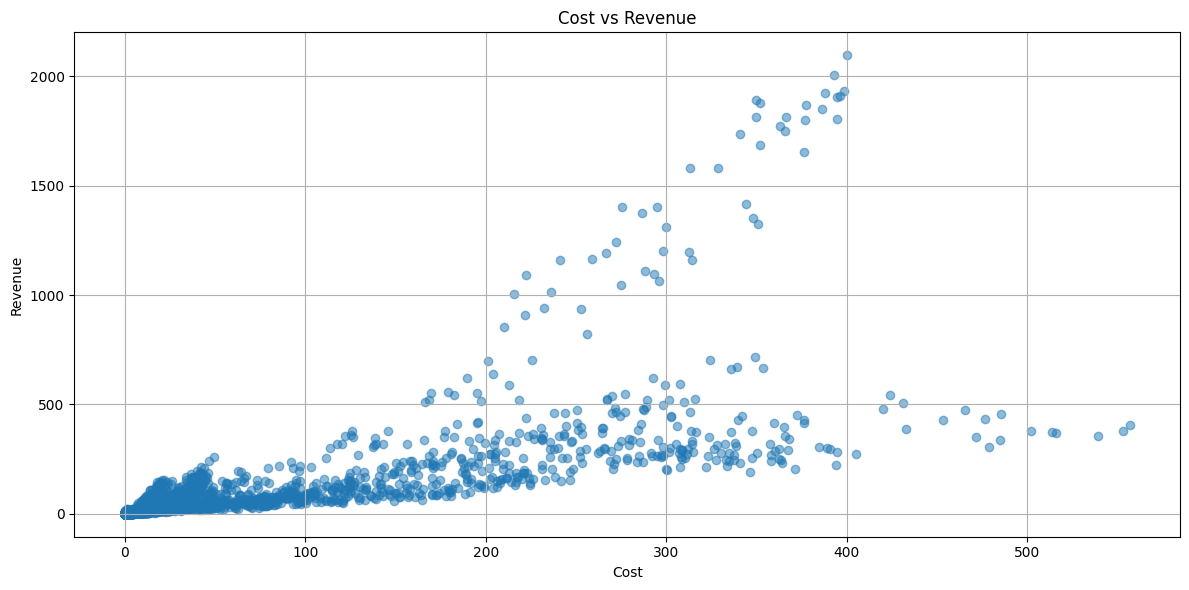

In [ ]:
#Scatter Plot
plt.figure(figsize=(12,6))
plt.scatter(cost,revenue,alpha=0.5)
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.title('Cost vs Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Why we did not use Heatmap Here
A heatmap is used to visualize the correlation matrix of several variables.

It shows the strength of correlation between all pairs of variables.
For 2 Variables we should use Scatter Plot

# 5.What is the average revenue generated per click for Company X during the campaign period?



In [ ]:
avg=df['revenue'].mean()
print(avg)

17.92994302310488


#6.Which campaigns had the highest post-click conversion rates?

In [ ]:
camp=df['campaign_number'].value_counts()
print(camp)

campaign_number
camp 3    6917
camp 1    6877
camp 2    1614
Name: count, dtype: int64


In [ ]:
# Sorting the DataFrame by 'post_click_conversion_rate' in descending order
sorted_df = df.sort_values(by='post_click_conversions', ascending=False)
print("Campaigns with the highest post-click conversion rates:")

print(sorted_df[['campaign_number', 'post_click_conversions']].head())

Campaigns with the highest post-click conversion rates:
     campaign_number  post_click_conversions
6887          camp 1                    3369
5447          camp 1                    3277
1473          camp 1                    3191
838           camp 1                    3006
629           camp 1                    3004


#7. Are there any specific trends or patterns in post-click sales amounts over time?

month
April    6269
May      4705
June     4434
Name: count, dtype: int64


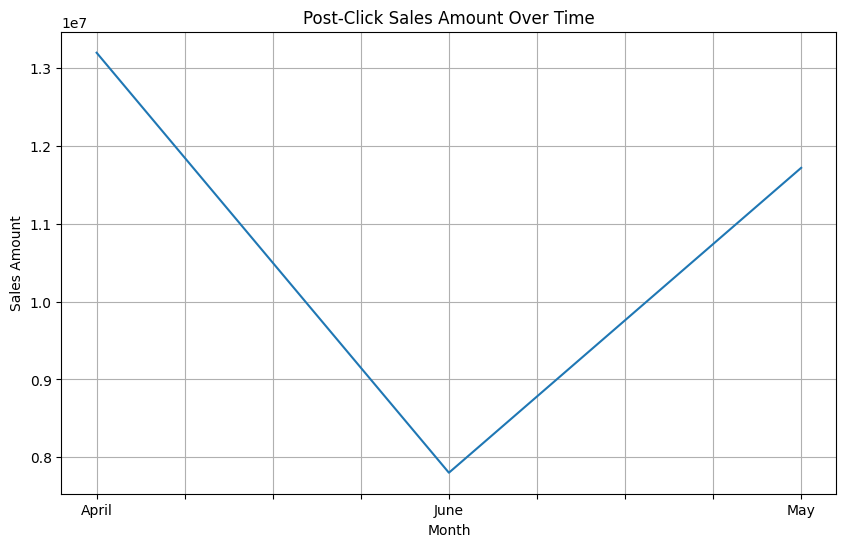

In [ ]:
# Group by date to analyze trends over time
month=df['month'].value_counts()
print(month)
sales_trend = df.groupby('month')['post_click_sales_amount'].sum()

# Plot the sales trend
plt.figure(figsize=(10, 6))
sales_trend.plot(title='Post-Click Sales Amount Over Time') #
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

#df.groupby('month')
This tells Pandas to group the data in the DataFrame .Each unique value in the month column becomes a group.
For instance, if your month column has values like 1, 2, 3,..., 12, it creates 12 groups (one for each month).

['post_click_sales_amount']:

After grouping by month, you select the post_click_sales_amount column to perform an aggregation.
This step isolates the post_click_sales_amount data within each group.

.sum():

This is an aggregation function applied to the grouped data.
It sums up the post_click_sales_amount values within each month.

#8.How does the level of user engagement vary across different banner sizes?

Converting Categorical Strings to Numeric Values
To calculate the average engagement, you'll need to map these string values to corresponding numeric values. Here's how you can approach it:

In [ ]:
# Create a mapping dictionary
engagement_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Map the values in the user_engagement column to numbers
df['user_engagement'] = df['user_engagement'].map(engagement_mapping)
print(df['user_engagement'].value_counts())


user_engagement
2    5489
1    5035
3    4884
Name: count, dtype: int64


In [ ]:
# Drop rows with NaN values in user_engagement after mapping
#Handle Any Missing or Invalid Values ,If there are any values in user_engagement that don't match 'Low', 'Medium', or 'High', they'll be mapped to NaN.
#df = df.dropna(subset=['user_engagement'])

In [ ]:
print(df['user_engagement'].isna().sum())  # Check for NaNs
print(df['user_engagement'].value_counts())  # Check the distribution of the values

0
user_engagement
2    5489
1    5035
3    4884
Name: count, dtype: int64


banner
160 x 600    1.990582
240 x 400    1.950928
300 x 250    1.972695
468 x 60     2.038968
580 x 400    1.950495
670 x 90     1.979167
728 x 90     2.003501
800 x 250    2.155989
Name: user_engagement, dtype: float64


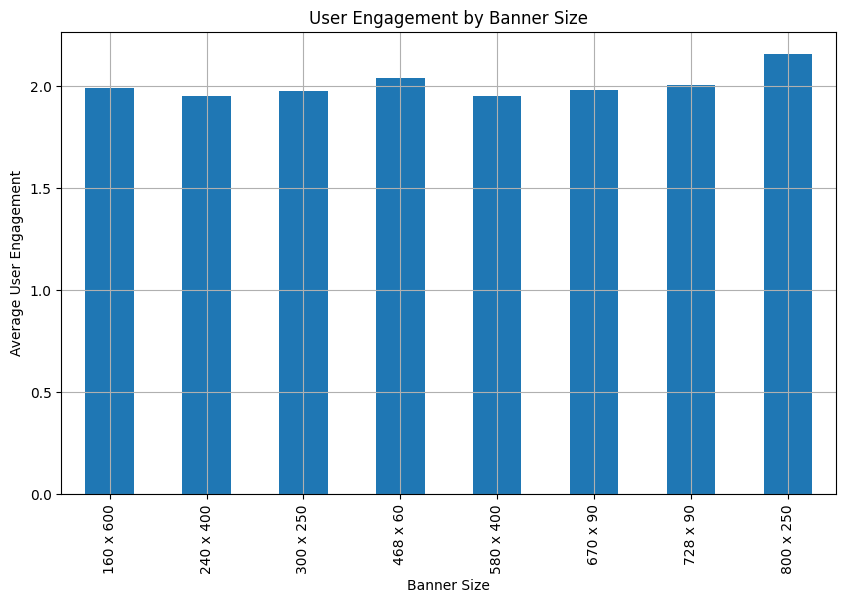

In [ ]:
# Group by banner size to calculate average engagement
engagement_by_banner = df.groupby('banner')['user_engagement'].mean()
print(engagement_by_banner)  # Check the Series after grouping
# Plot engagement by banner size
plt.figure(figsize=(10, 6))
engagement_by_banner.plot(kind='bar', title='User Engagement by Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('Average User Engagement')
plt.grid(True)
plt.show()

groupby(['banner', 'user_engagement']): Groups the data by both banner size and user_engagement levels.
size().unstack(fill_value=0): Counts the number of occurrences of each engagement level for each banner size and reshapes the data into a format suitable for plotting.
stacked=True: Creates a stacked bar chart where each bar represents a banner size, and the segments represent the different levels of user engagement.

plot() , pandas function
The plot() method is available because engagement_by_banner is a Pandas Series (or DataFrame), and Pandas automatically includes this plotting capability.

#9.Which placement types result in the highest post-click conversion rates?

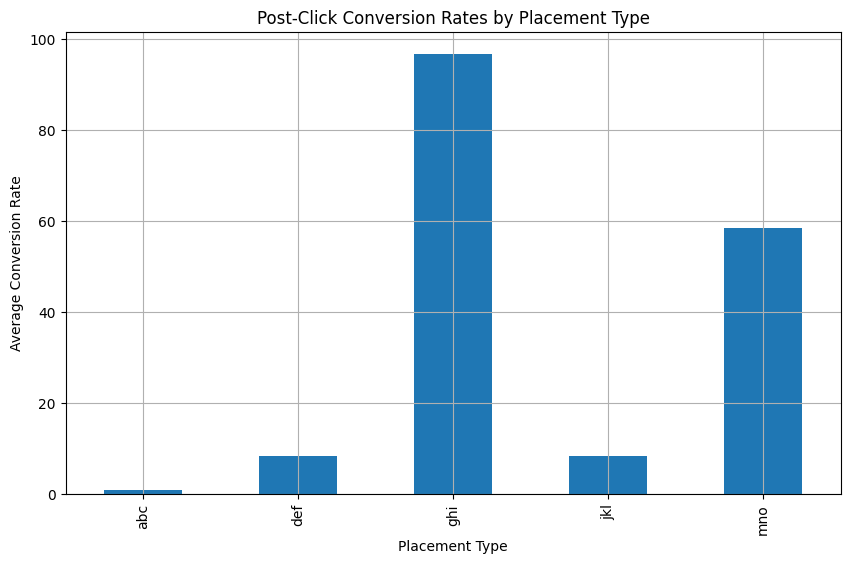

In [ ]:
# Group by placement type to calculate average post-click conversion rate
conversion_by_placement = df.groupby('placement')['post_click_conversions'].mean()

# Plot conversion rates by placement type
plt.figure(figsize=(10, 6))
conversion_by_placement.plot(kind='bar', title='Post-Click Conversion Rates by Placement Type')
plt.xlabel('Placement Type')
plt.ylabel('Average Conversion Rate')
plt.grid(True)
plt.show()

#11.Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

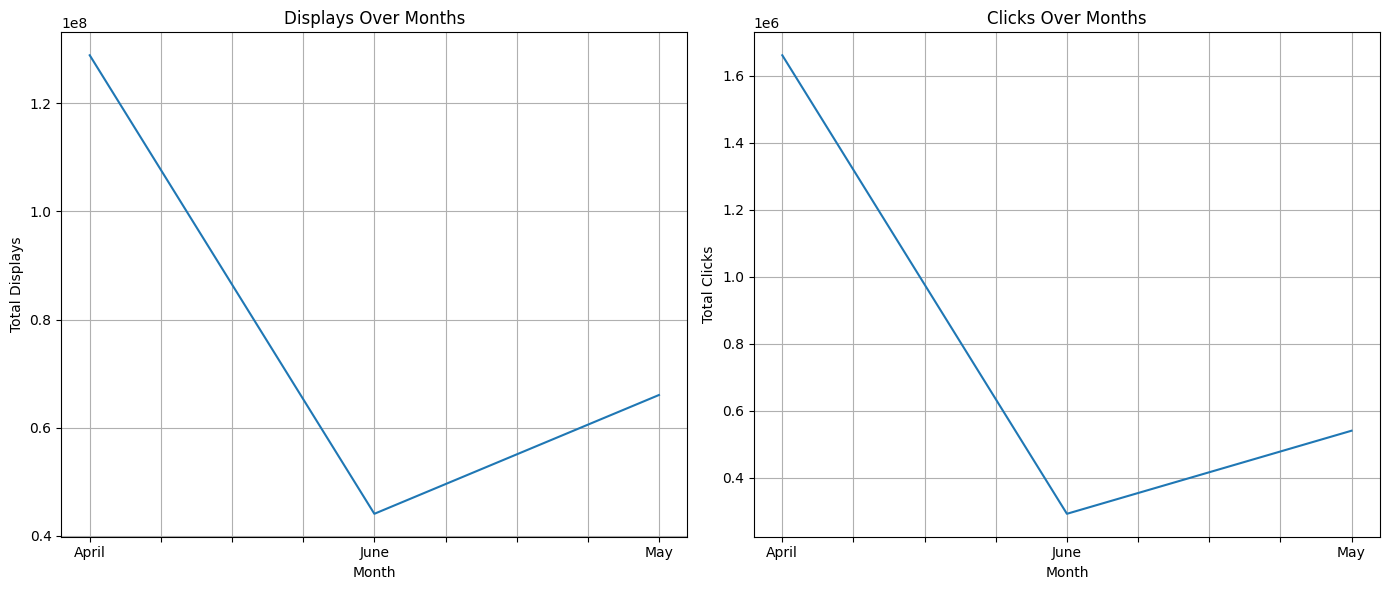

In [ ]:
# Group by month to analyze seasonal trends
seasonal_displays = df.groupby('month')['displays'].sum()
seasonal_clicks = df.groupby('month')['clicks'].sum()

# Plot seasonal trends
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
seasonal_displays.plot(title='Displays Over Months')
plt.xlabel('Month')
plt.ylabel('Total Displays')
plt.tight_layout()
plt.grid(True)

plt.subplot(1, 2, 2)
seasonal_clicks.plot(title='Clicks Over Months')
plt.xlabel('Month')
plt.ylabel('Total Clicks')

plt.tight_layout()
plt.grid(True)
plt.show()


#12.Is there a correlation between user engagement levels and the revenue generated?

In [ ]:
correlation=df['user_engagement'].corr(df['revenue'])
print(correlation)

0.1753892426950314


Now we should print it with scatter plot

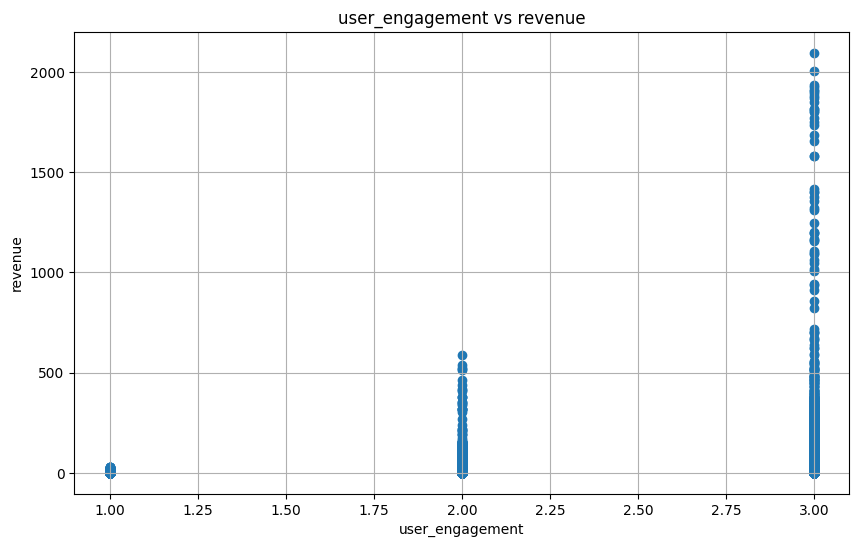

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['user_engagement'],y=df['revenue'])
plt.xlabel('user_engagement')
plt.ylabel('revenue')
plt.title('user_engagement vs revenue')
plt.grid(True)
plt.show()

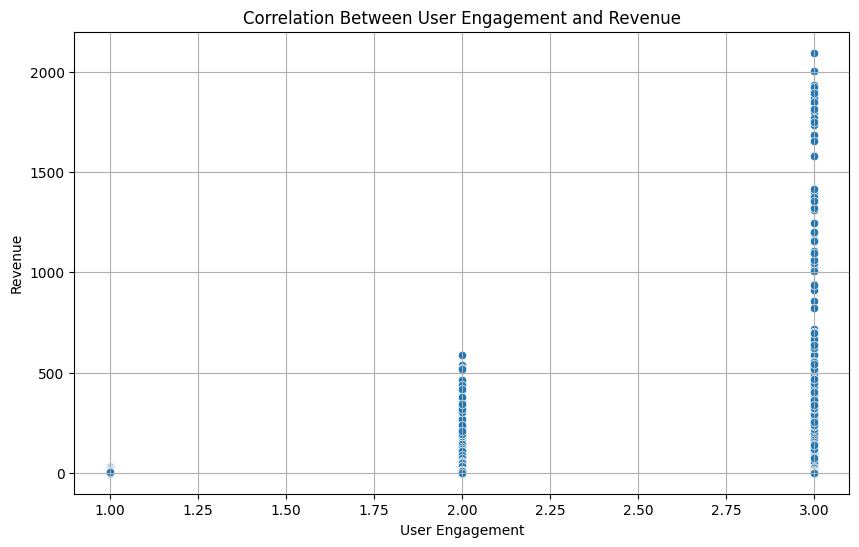

In [ ]:
# Scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_engagement', y='revenue', data=df) # in sns lib we have to submit one extra data arguement as our dataframe name
plt.title('Correlation Between User Engagement and Revenue')
plt.xlabel('User Engagement')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# 13.Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

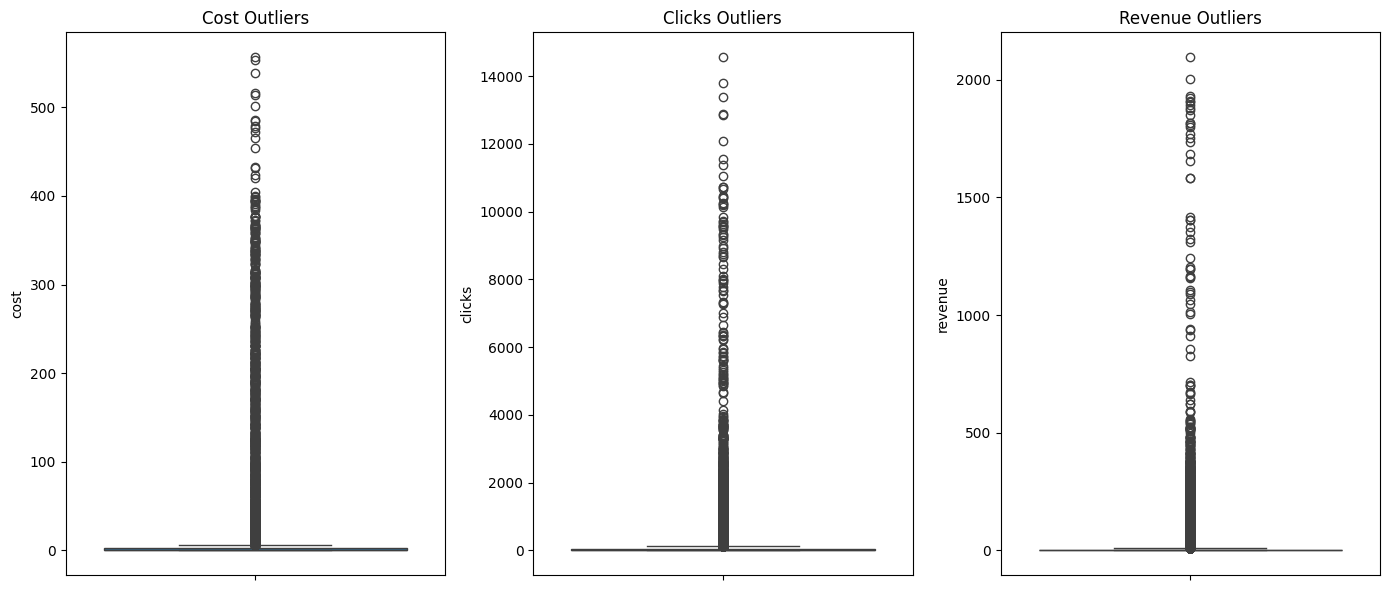

In [ ]:
# Plotting boxplots to identify outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(df['cost'])
plt.title('Cost Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(df['clicks'])
plt.title('Clicks Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(df['revenue'])
plt.title('Revenue Outliers')

plt.tight_layout()
plt.show()


Yes, There are outliers , that can be scene in the boxplot

#14.	How does the effectiveness of campaigns vary based on the size of the ad and placement type?

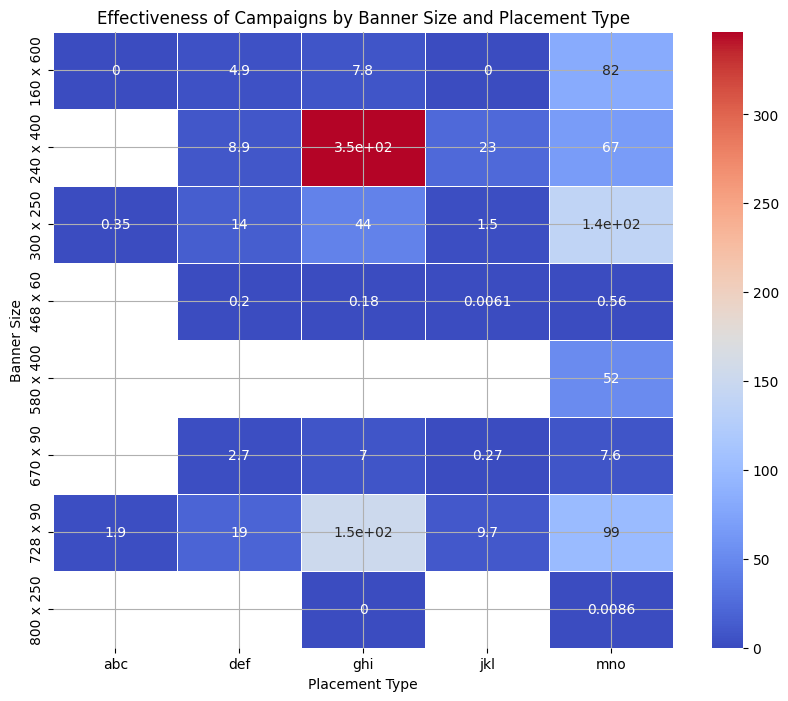

In [ ]:
# Group by ad size and placement type to calculate the average post-click conversion rate
effectiveness = df.groupby(['banner', 'placement'])['post_click_conversions'].mean().unstack()

# Heatmap to visualize the effectiveness
plt.figure(figsize=(10, 8))
sns.heatmap(effectiveness, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Effectiveness of Campaigns by Banner Size and Placement Type')
plt.xlabel('Placement Type')
plt.ylabel('Banner Size')
plt.grid(True)
plt.show()


Since there are more than 1 variables has effect on our Effectiveness of Campaigns we usd heatmap to show it.

#15.Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

#Return on Investment (ROI)

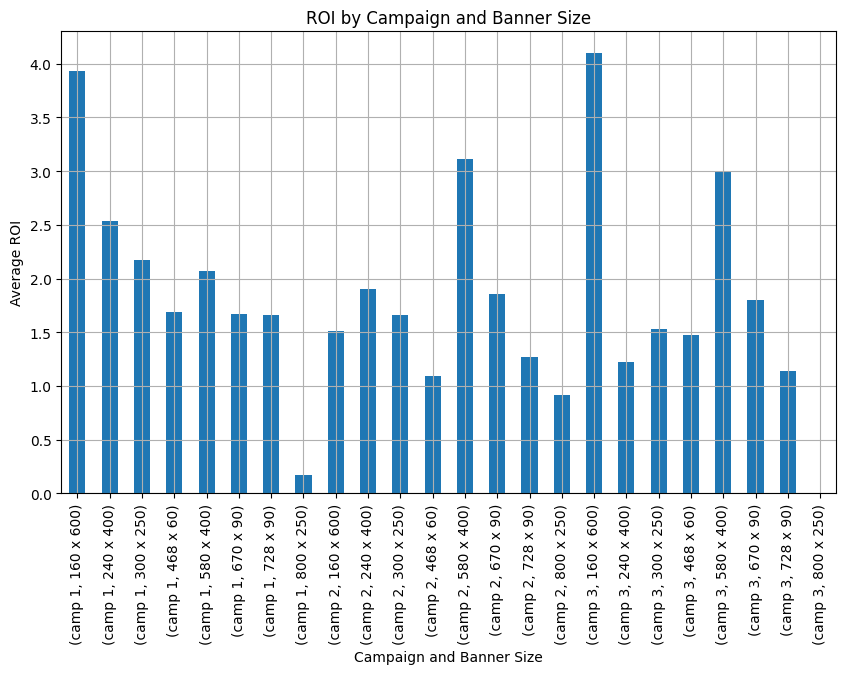

In [ ]:
# Calculate ROI as a new column
df['ROI'] = df['revenue'] / df['cost']

# Group by campaign and banner size to find average ROI
roi_by_campaign = df.groupby(['campaign_number', 'banner'])['ROI'].mean()

# Plot the ROI by campaign and banner size
plt.figure(figsize=(10, 6))
roi_by_campaign.plot(kind='bar', title='ROI by Campaign and Banner Size')
plt.xlabel('Campaign and Banner Size')
plt.ylabel('Average ROI')
plt.grid(True)
plt.show()


#16.What is the distribution of post-click conversions across different placement types?

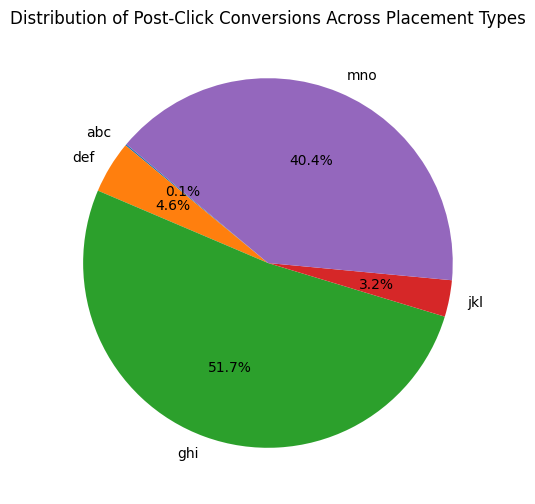

In [ ]:
# Group by placement type to count post-click conversions
conversion_distribution = df.groupby('placement')['post_click_conversions'].sum()

# Plot the distribution of post-click conversions
plt.figure(figsize=(10, 6))
conversion_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, title='Distribution of Post-Click Conversions Across Placement Types')  #plotting directly in pandas df
plt.ylabel('')
plt.show()


#17.Are there any noticeable differences in user engagement levels between weekdays and weekends?

In [ ]:
month=df['month'].value_counts()
print(month)


month
April    6269
May      4705
June     4434
Name: count, dtype: int64


In [ ]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['month_number'] = df['month'].map(month_mapping)
print(df['month_number'].value_counts())

month_number
4    6269
5    4705
6    4434
Name: count, dtype: int64


In [ ]:
# Display the mapped month numbers
print(df[['month', 'month_number']])

       month  month_number
0      April             4
1      April             4
2      April             4
3      April             4
4      April             4
...      ...           ...
15403  April             4
15404  April             4
15405   June             6
15406   June             6
15407   June             6

[15408 rows x 2 columns]


In [ ]:
# Check for NaN values
print(df['month_number'].isna().sum())  # Should be 0
print(df['day'].isna().sum())           # Should be 0

# Check unique values to ensure everything looks correct
print(df['month_number'].unique())
print(df['day'].unique())

0
0
[4 5 6]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [ ]:
# Print the column names to verify
print(df.columns)

# Print the first few rows of the DataFrame
print(df.head())

Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount', 'Unnamed: 12',
       'Unnamed: 13', 'month_number'],
      dtype='object')
   month  day campaign_number user_engagement     banner placement  displays  \
0  April    1          camp 1            High  160 x 600       abc         4   
1  April    1          camp 1            High  160 x 600       def     20170   
2  April    1          camp 1            High  160 x 600       ghi     14701   
3  April    1          camp 1            High  160 x 600       mno    171259   
4  April    1          camp 1             Low  160 x 600       def       552   

       cost  clicks   revenue  post_click_conversions  \
0    0.0060       0    0.0000                       0   
1   26.7824     158   28.9717                      23   
2   27.6304     158   28.9771                      78   
3  216.8750    1796  32

In [ ]:
# Ensure that the DataFrame has correct columns and no unexpected data
assert 'month_number' in df.columns, "'month_number' column is missing!"
assert 'day' in df.columns, "'day' column is missing!"
print(df.isna().sum())  # Check for NaN values in the DataFrame

# Create the 'date' column by combining 'month_number' and 'day' with a default year
df['date'] = pd.to_datetime(df.assign(year=2024)[['year', 'month_number', 'day']], errors='raise')

# Extract the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Display the resulting DataFrame
print(df[['date', 'day_of_week']])

month                          0
day                            0
campaign_number                0
user_engagement                0
banner                         0
placement                    413
displays                       0
cost                           0
clicks                         0
revenue                        0
post_click_conversions         0
post_click_sales_amount        0
Unnamed: 12                15408
Unnamed: 13                15408
month_number                   0
dtype: int64


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month] is missing

In [ ]:
#Group by 'day_of_week' and calculate the average user engagement
engagement_by_day = df.groupby('day_of_week')['user_engagement'].mean()

# Plot user engagement by day of the week
plt.figure(figsize=(10, 6))
engagement_by_day.plot(kind='bar', title='User Engagement by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average User Engagement')
plt.grid(True)
plt.show()


#18.How does the cost per click (CPC) vary across different campaigns and banner sizes?

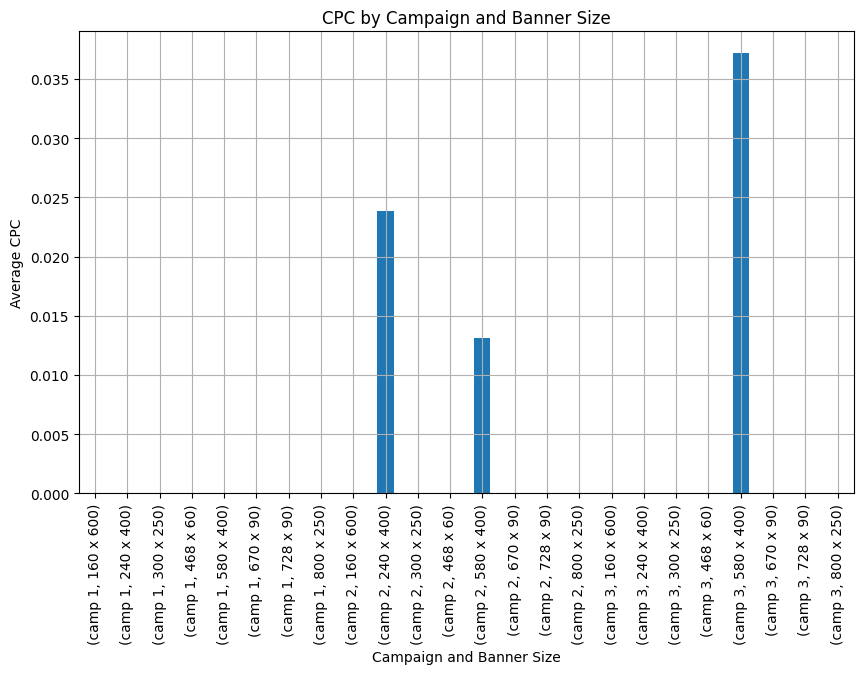

In [ ]:
# Calculate CPC as a new column
df['CPC'] = df['cost'] / df['clicks']

# Group by campaign and banner size to calculate average CPC
cpc_by_campaign = df.groupby(['campaign_number','banner'])['CPC'].mean()

# Plot CPC by campaign and banner size
plt.figure(figsize=(10, 6))
cpc_by_campaign.plot(kind='bar', title='CPC by Campaign and Banner Size')
plt.xlabel('Campaign and Banner Size')
plt.ylabel('Average CPC')
plt.grid(True)
plt.show()


#19.	Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?

In [ ]:
# Group by campaign and placement type to calculate average  post-click conversions
df['CPC'] = df['cost'] / df['clicks']
cost_effectiveness = df.groupby(['campaign_number', 'placement']).agg({'CPC': 'mean', 'post_click_conversions': 'mean'})

# Identify campaigns and placements that are cost-effective (low CPC, high conversions)
cost_effective_campaigns = cost_effectiveness.sort_values(by=['post_click_conversions','CPC'], ascending=[False, True])

print(cost_effective_campaigns.head(10))  # Display the top 10 cost-effective campaigns and placements


                           CPC  post_click_conversions
campaign_number placement                             
camp 1          ghi        inf              212.547804
                mno        inf              127.900602
camp 2          ghi        inf               19.077994
camp 1          def        inf               17.906566
                jkl        inf               16.998309
camp 2          mno        inf               11.388889
                def        inf                2.844444
                jkl        inf                2.096654
camp 1          abc        inf                1.975550
camp 3          mno        inf                1.500245


# 20. Can we identify any trends or patterns in post-click conversion rates based on the day of the week?

In [ ]:
# Group by day of the week to calculate average post-click conversion rate
conversion_by_day = df.groupby('day_of_week')['post_click_conversions'].mean()

# Plot conversion rates by day of the week
plt.figure(figsize=(10, 6))
conversion_by_day.plot(kind='bar', title='Post-Click Conversion Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Conversion Rate')
plt.grid(True)
plt.show()

KeyError: 'day_of_week'

#21.•	How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?


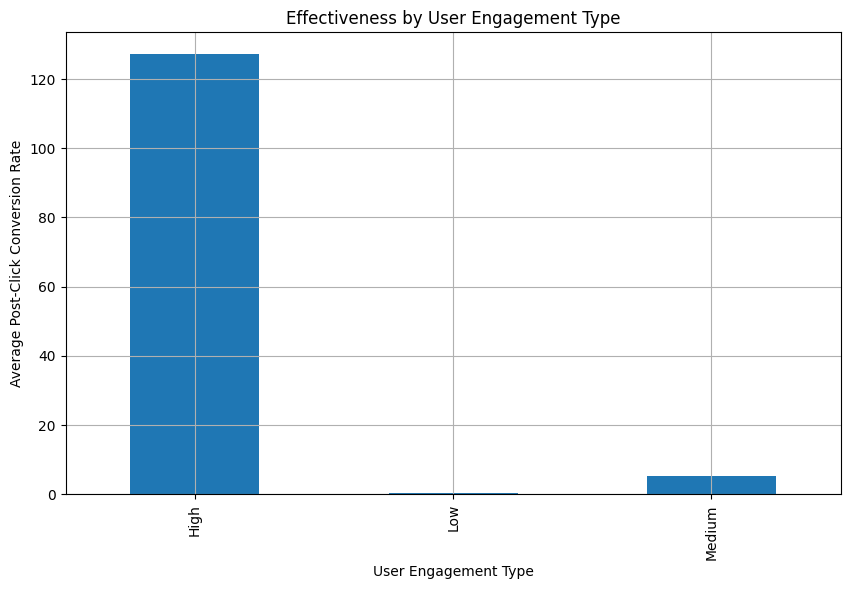

In [ ]:
# Group by user engagement type (e.g., high/medium/low if available) and calculate average post-click conversion rate
effectiveness_by_engagement = df.groupby('user_engagement')['post_click_conversions'].mean()

# Plot effectiveness by user engagement type
plt.figure(figsize=(10, 6))
effectiveness_by_engagement.plot(kind='bar', title='Effectiveness by User Engagement Type')
plt.xlabel('User Engagement Type')
plt.ylabel('Average Post-Click Conversion Rate')
plt.grid(True)
plt.show()